### The geometric series 


$$\frac{a\cdot(1-r^n)}{(1-r)} = \sum_{k=0}^{\infty} a\cdot r^n = a + a\cdot r + a\cdot r^2 + \dots$$ 

In this article I am working on a special case of geometric series where $a = 1$ and $|r| < 1 $. It looks like this

<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 

_______________

Taylor series is an infinite series but I cannot run the loop forever so I need to find a terminating condition. Since $|x| < 1$, the term approaches $0$ as power increases. I will use this as the terminating condition. So the naive implementation will find the value of each term until it reaches zero, add them to the sum and return sum in the end.

In [1]:
import utils
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import timeit
import copy

In [2]:
def gpsum_naive(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
        b = pow(a,i)
        s = s + b
        i = i + 1
    return s, i

The seen is done. I have a function which meets the requirement, it gives the value of geometric series according to formula. Previously I talked about all the unseen aspects of programming and how they make it better. What about them? Is the naive implementation giving the right output for all values of $x$. I need to test it for different values of $x$. Testing it manually would be slow and I won't be able to cover all the cases. But hey! I've defined a generic testing function which I will use to test ```gpsum_naive()```.

In [3]:
'''
Returns 1/(1-x) = Exact value of geometric series
'''
def gp(x) :
    return (1/(1-x))

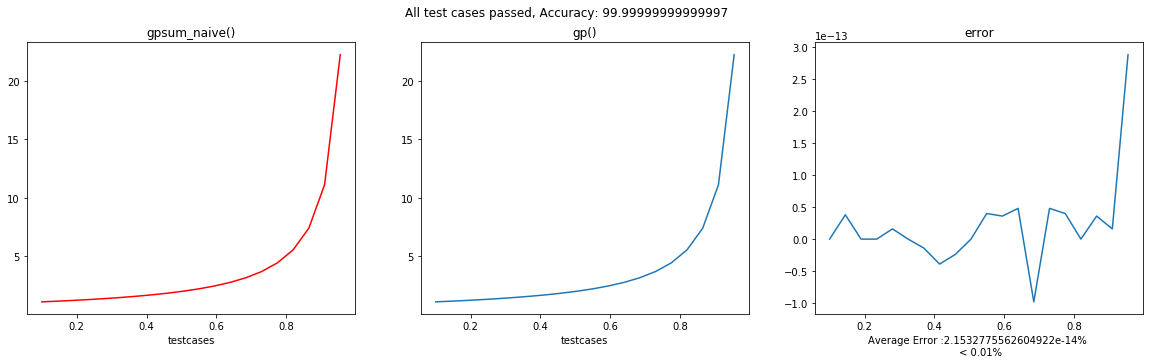

In [4]:
utils.theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

The two plots for ```gpsum_naive()``` and ```gp()``` are exactly the same but the error plot shows that there is an error of $1e-13$ between individual testcases. 

Now I have a naive implementation which workds fine for different testcases. But what about its computation time? Is the computation time same for all values of $x$? Is it different? How do I find it? 
<br>Python's ```timeit``` library can be used to time small bits of python code just like its shown below. 

In [5]:
%%timeit
gpsum_naive(0.5)

322 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Doing this for different values of $x$ would take a lot of time. Just like the testing function I can make a generic function which will plot the runtime for different values of $x$. First I will define a function called ```find_time(function, testcase)``` that will use ```timeit.Timer()``` to time the ```function``` for different values of $x$ in ```testcase``` and return them in a list. Another function ```plot_time(testcase, plotNaive, **kwargs)``` will plot the list returned by ```find_time()``` along with speedup with respect to the naive implementation. ```**kwargs``` is used when the number of parameters are not fixed. This way I don't have to worry about the number of functions I have to pass to ```plot_time()``` and compare any number of functions.    

In [6]:
def find_time(testcase, func):
    '''
    Calculates computation time for each testcase
    Appends it in the list
    And returns the list -> time[]
    '''
    time = []
    for i in testcase:
        t = timeit.Timer("func(i)", globals={"func": func, "i": i})
        time.append(t.timeit(number = 7))
    return time
    #return time, mean

def plot_time(testcase,plotNaive, **kwargs):
    '''
    This function plots two graphs
    1. Runtime
    2. Speedup with respect to naive implementation
    
    plotNaive is a boolean variable 
    if plotNaive = True:
        plot runtime for naive in graph-1
    else :
        don't plot naive runtime
        
    **kwargs is a dictionary of tuples - (list of time, function)
    
    '''
    
    legend_list = []                        #legend for graph 1 - runtime
    legend_list_speedup = []                #legend for graph 2 - speedup
    avg_time = []                           #average time for different functions
    fno = 0
    base_list = []                          #runtime of naive implementation or any function you want to calculate speedup against
    time_list = []                          #contains lists of runtime for different functions in kwargs
    
    #iterating through kwargs
    for key, value in kwargs.items():
        time_list.append(value[0])                     #value = (list of runtime for a function, function)      
        avg_time.append(statistics.mean(value[0]))
        legend_list.append(value[1].__name__+"()")
        
        if fno == 0:                                
            base = value[1]                            #storing naive for finding speedup
            base_list = copy.deepcopy(value[0])
        fno += 1
        
    #for plotting time of only one function
    if fno == 1:
        fig, ax = plt.subplots(1, 1, figsize = (5,5))
        ax.plot(testcase, time_list[0])
        ax.set_ylabel("time")
        ax.legend(legend_list)
        ax.set_title("Runtime") 
        xlabel = "$x$"
        for i in range(len(legend_list)):
            xlabel = xlabel + "\n avg time for "+legend_list[i]+": "+str(avg_time[i])
        ax.set_xlabel(xlabel)


    #for plotting time of multiple functions and their speedup compared to naive
    else:
        fig, ax = plt.subplots(1, 2, figsize = (12, 5))

        xlabel_runtime = "$x$"
        xlabel_speedup = "$x$"
        
        if plotNaive == False :
            start = 1                                   
        else:
            start = 0
        
        for i in range(start, len(time_list)):
            ax[0].plot(testcase, time_list[i])              #plotting runtime
            
            if i > 0:
                speedup = [round(b / m, 7) for b,m in zip(base_list, time_list[i])]     #calculating speedup
                ax[1].plot(testcase, speedup)                                           #plotting speedup
                xlabel_speedup = xlabel_speedup + "\n avg speedup for "+legend_list[i] + ": " +str(round(sum(speedup)/len(speedup), 4))

        for i in range(len(legend_list)):
            xlabel_runtime = xlabel_runtime + "\n avg time for "+legend_list[i]+": "+str(avg_time[i])        
                
        #labels for runtime plot
        ax[0].set_ylabel("time")                            
        ax[0].legend(legend_list[start:])
        ax[0].set_title("Runtime") 
        ax[0].set_xlabel(xlabel_runtime)
        
        #labels for speedup
        ax[1].set_title("Speedup with respect to " + base.__name__)                 
        ax[1].set_ylabel("Speedup")                                     
        ax[1].legend(legend_list[1:])
        ax[1].set_xlabel(xlabel_speedup)
     
    

In [7]:
naive_gp = utils.find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_naive)

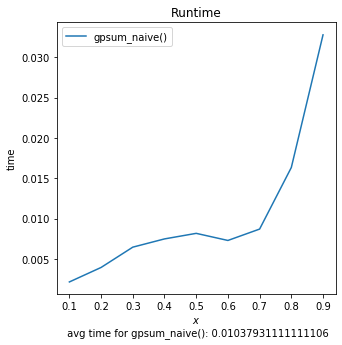

In [8]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (naive_gp, gpsum_naive))

As the value of $x$ is increasing the time is also increasing. For the naive implementation, time depends on number of iterations and iterations depend on how fast or slow the series is converging. I will plot the series for different values of $x$ to understand the relation between $x$ and convergence.

In [9]:
def plot_term(terms, function, string) :
    '''
    This is a generic function
    arguments:
        terms - different values of x for which the terms will be calulated
        function - will return the n^(th) term
        string - shows a general reperesentation of the term
    the function calculates first 30
    5th term is rounded off to its 3rd decimal and highlighted in red
    '''
    l = []
    for x in terms :
        sl = []
        for i in range(0,30) :
            sl.append(function(x,i))
        l.append(sl)

    
    if len(l) == 1 :
        fig, ax = plt.subplots(1,1, figsize = (5,5))
        ax.plot(l[0]);
        ax.set_title(terms[0]);
        ax.set_ylabel(string);
        ax.set_xlabel('i');
    else:
        fig, ax = plt.subplots(1, len(l), figsize = (20,4))
        
        for i in range(0,len(l)) :
            ax[i].plot(l[i]);
            ax[i].set_title(terms[i]);
            ax[i].set_ylabel(string);
            ax[i].set_xlabel('i');
            ax[i].text(5, l[i][5]+0.05, round(l[i][5],3), color = 'red')


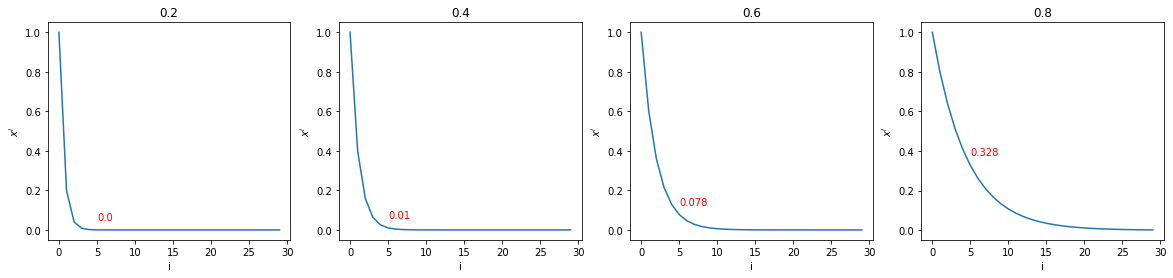

In [10]:
def gp_terms(x, i):
    return x**i
terms = [0.2, 0.4, 0.6, 0.8]
utils.plot_term(terms, gp_terms, "$x^i$")

As the term number increases the value of the term decreases. The rate at which this happens is a function of $x$. For lower values of $x$ the terms drop down a lot faster. This is why the time and no.of iterations increase as the value of x increases. 
<p>Why did I do all this? The naive implementation is done and it gives the right output but thats not enough. Earlier I talked about performance as an unseen aspect of a good software. A good software gives the right output in minimum time. To optimize a function I need to understand what factors are affecting its performance. With the help of visualization I understood how the runtime differs for different values of $x$ and what is the relation between them. So now I can think of one way to increase performance is by reducing the number of iterations.<br>I can think of other ways to optimize by observing the naive implementation. Since I am calculating the power at every iteration, I could find a faster method to do it. Also notice the way I am finding each term. I am directly finding $x^n$ whereas the definition itself says that every term is the product of previous term and the common ratio. This will be my third case of optimization. In the end I will put these 3 cases together and see what effect I get on speed up and accuracy. The diagram below shows the different optimizations I will be performing on naive. 

![title](img/gp_layout.png) 

______________________

![title](img/gpsum_iter.png) 

First lets take a look at number of iterations taken by naive implementation for different values of $x$. Following is a generic function that will plot the number of iterations for any function passed to it.

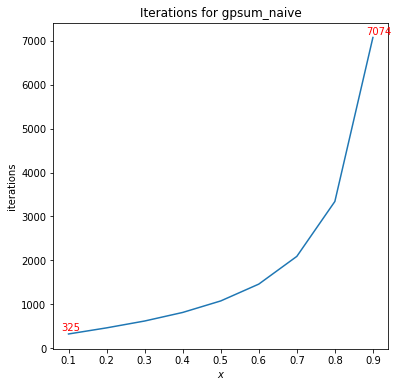

In [11]:
def plot_iterations(testcase, function):
    itr = []
    
    for i in testcase:
        itr.append(function(i)[1])
        
    fig, ax = plt.subplots(1, 1, figsize = (6,6))
    ax.plot(testcase, itr)
    ax.set_xlabel('$x$')
    ax.set_ylabel('iterations')
    ax.text(testcase[0] - testcase[-1]*0.02, itr[0] + itr[-1]*0.01, itr[0], color = 'red')
    ax.text(testcase[-1] - testcase[-1]*0.02, itr[-1] + itr[-1]*0.01, itr[-1], color = 'red')
    ax.set_title('Iterations for '+ function.__name__)
    
plot_iterations(np.linspace(0.1, 1, 9, endpoint = False), gpsum_naive)

The number of iterations are going up to 7074 for $x = 0.9$. Since $x$ is a float, $x^n$ is also going to be a float and python has 53 bits of precision for float therefore the function goes on iterating till the last bit. This level of precision gives an error of 2.153e-14%. My goal is to get an error less than 0.01 which this satisfies perfectly but maybe I could trade accuracy for speed just enough so that the error still remains below 0.01%. 

In [12]:
def gpsum_iterations(a):
    s = 0
    count = 0
    t = 1
    actual = gp(a)
    '''
    error should be < 0.01
    and error = ((actual - s)/actual)*100
    Therefore, s = actual*(1 - 0.0001) = check
    '''
    check = actual*(1 - 0.0001)
    
    #while(b != 0):
    while s < check:
        t = pow(a, count)
        s = s + t
        count = count + 1
    return s, count

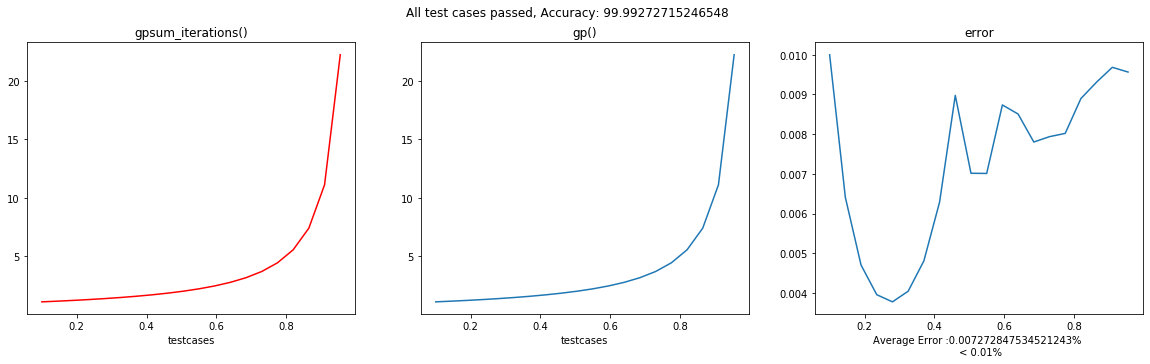

In [13]:
utils.theSeenAndTheUnseenTest(gpsum_iterations, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

```gpsum_iterations()```, ```gpsum_naive()``` and ```gpsum_naive()``` look exactly the same. But look at the error plot how different they are. I am again calling the test function on ```gpsum_naive()``` so that you can see the similarity and difference between the 2 functions. Without the error plot I would just know that the average error is < 0.01 but I wouldn't know how it varies for individual values. 

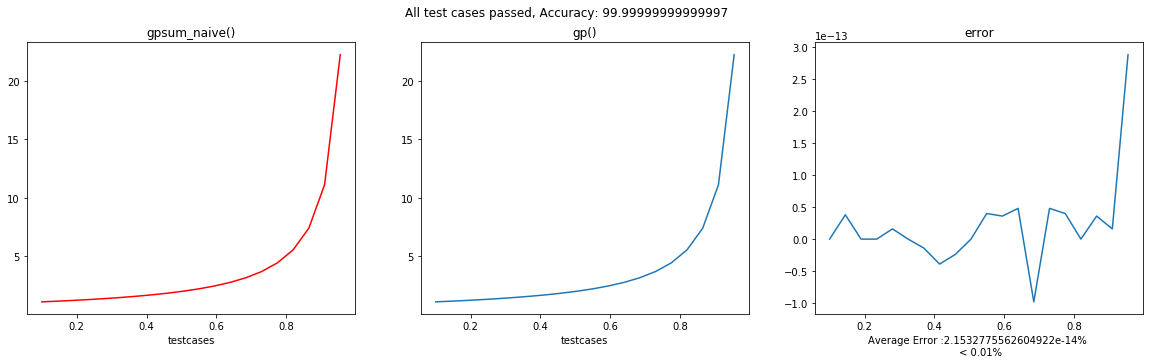

In [14]:
utils.theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

What about the performance? 

In [15]:
iterations_gp = utils.find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_iterations)

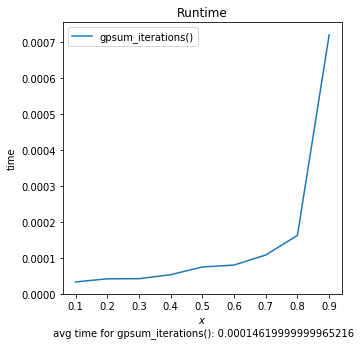

In [16]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (iterations_gp, gpsum_iterations))

Comparing this runtime with naive implementation.

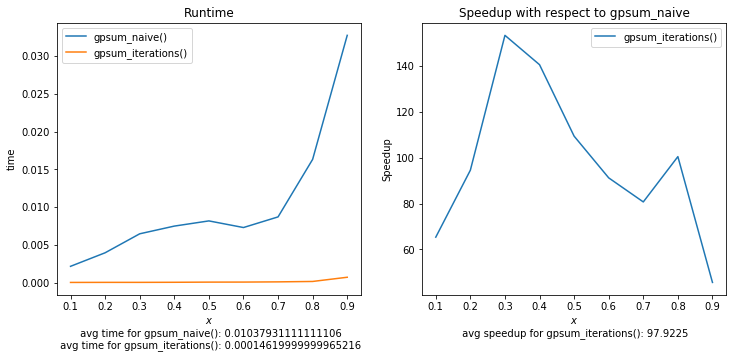

In [17]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), second = (iterations_gp, gpsum_iterations))

#### This is 100x faster

I got this speedup by reducing the number of iterations. To compare the number of iterations of ```gpsum_naive()``` and ```gpsum_iterations()``` I will write a function which plots them for different values of $x$. Since I would be comparing iterations for other optimizations in exponential or sine, cosine series I will make this function generic.

In [18]:
'''
    compare_functions() takes 4 parameters -function1, function2, function3, type of the function.
    Function 1 and 2 need to return a tuple containing value of series 
    and the number of itertations. 
    Function 3 returns the actual value of the series. 
    
    compare_function will plot 2 graphs
    Graph 1 - Iterations taken by func1 and func2 
    Graph 2 - Values calculated by all 3 functions
'''
def compare_functions(func1, func2, func3, function, testcases):
    
    itr1 = []                       #iterations for func1
    itr2 = []                       #iterations for func2
    actual = []                     #actual ans for series
    ans1 = []                       #ans returned by func1
    ans2 = []                       #ans returned by func2
    
    for i in testcases :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])        #storing iteration
        itr2.append(tup2[1])
        ans1.append(tup1[0])        #storing ans
        ans2.append(tup2[0])
        actual.append(func3(i))  
        
        
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    factor_x = testcases[-1]*0.05
    factor_y = itr1[-1]*0.02
    #Graph 1 - Iterations taken by func1 and func2
    ax[0].plot(testcases,itr1, color = 'red')
    ax[0].plot(testcases,itr2)
    ax[0].text(testcases[-1] - factor_x, itr1[-1] + factor_y, itr1[-1])
    ax[0].text(testcases[-1] - factor_x, itr2[-1]+ factor_y, itr2[-1])
    ax[0].text(testcases[0], itr1[0] + factor_y, itr1[0])
    ax[0].text(testcases[0], itr2[0] + factor_y, itr2[0])
    ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
    ax[0].set_title("Iterations")
    ax[0].set_ylabel("No.of Iterations")
    ax[0].set_xlabel("$x$")
    
    #Graph 2 - Values returned by the 3 functions
    ax[1].plot(testcases, ans1, color = 'red')
    ax[1].plot(testcases, ans2)
    ax[1].plot(testcases, actual)
    ax[1].legend([func1.__name__+"()",func2.__name__+"()",func3.__name__])
    ax[1].set_title("Values of "+function)

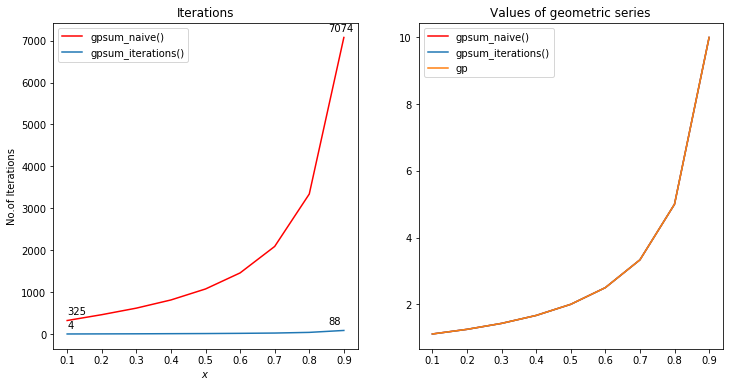

In [19]:
utils.compare_functions(gpsum_naive,gpsum_iterations,gp,"geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

See how the graphs on runtime and iterations look similar. The runtime for the ```gpsum()``` majorly depended on the no.of iterations. By limiting the no.of iterations just enough to reach the desired accuracy I got a speedup of $100\times$. In ```gpsum_iterations()``` I am loosing some accuracy but gaining a speedup of $100\times$.

| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$13 ms$| - |
| Iterations | $100\mu s$ | $100\times$|

______________________

![title](img/gp_power.png) 

In [20]:
def gpsum_power(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
      # b = pow(a, i) 
        b = a**i
        s = s + b
        i = i + 1
    return s, i

I've replaced ```pow(a, i)``` with ```**```, before checking anything else lets call the testing function on ```gpsum_power()```.

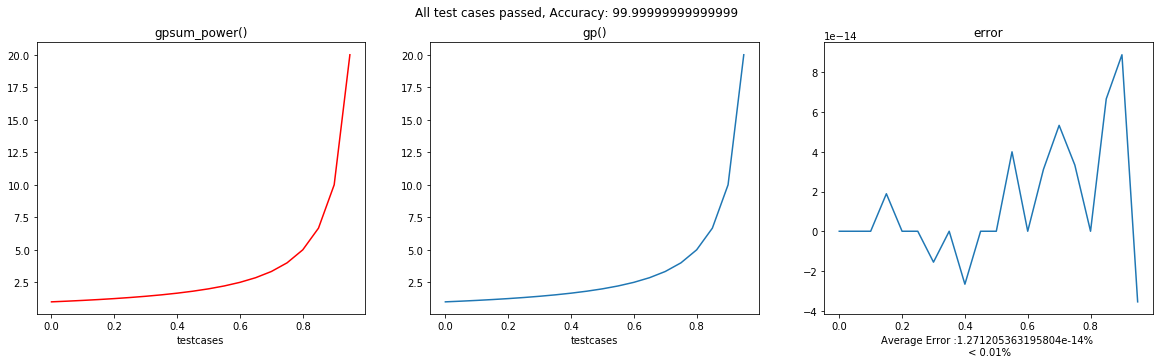

In [21]:
utils.theSeenAndTheUnseenTest(gpsum_power, gp, np.linspace(0, 1, num = 20, endpoint = False))

I've replaced one inbuilt function with another to check how it affects the performance but before doing so let's check the similarity or difference between the error of the two functions. I'm calling the test function again on ```gpsum_naive()```.

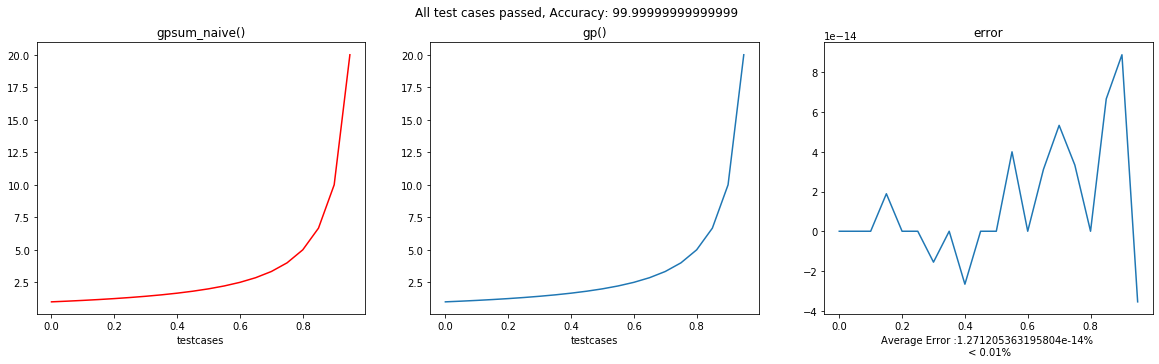

In [22]:
utils.theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0, 1, num = 20, endpoint = False))

See the error value is exactly the same. To see how it affects the performance I will call ```plot_time()``` on ```gpsum_power()```.

In [23]:
power_gp = utils.find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_power)

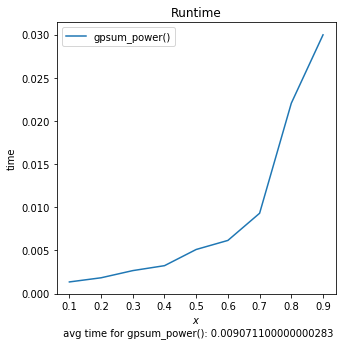

In [24]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), False, first = (power_gp, gpsum_power))

Let's compare it with ```gpsum_naive()```.

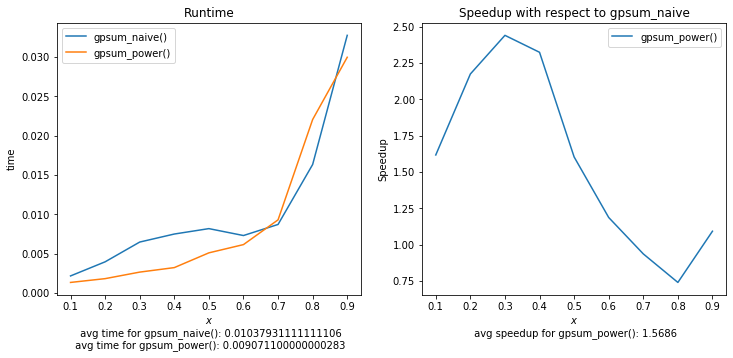

In [25]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (naive_gp, gpsum_naive), second = (power_gp, gpsum_power))

The time taken for naive and power optimization is almost the same. For some values its less while for some its more. Changing the power function doesn't make any significant difference. Therefore I won't be considering this as an optimization case.

------

![title](img/gpsum_calc.png)


In [26]:
def gpsum_cal(a):
    s = 1
    t = 1
    i = 1
    while t != 0:
        t = t*a
        s += t
        i += 1
    return s, i

In [ ]:
utils.theSeenAndTheUnseenTest(gpsum_cal, gp, np.linspace(0, 1, num = 20, endpoint = False))

In ```gpsum_cal()``` I am multiplying a at every iterations because of which the value of the term never really drops down to zero and the loop runs infinitely. When I wrote ```gpsum_cal()``` I expected it to work for everything like it did for previous cases. Logically it's correct, and gives an impression that it will run faster and give the same output. Without testing I wouldn't have known about this error. This is one example of why testing is important.
<p>To check what is happening to the terms and the end result I will run the loop till 7100 iterations.

In [27]:
def gpsum_cal_check(a):
    s = 1
    t = 1
    i = 1
    while t != 0 :
        t = t*a                             #optimized case
        s += t
        i += 1
        if i >= 7100 :                      #runtime too long
            print("Runtime too long")
            print("Second last term = ", t)
            print("Last term = ", t*a)
            i += 1
            break
    return s, i

In [28]:
print("\n x : ", "(1 + x + x^2 + ... , No.of Iterations )")
for i in np.linspace(0.1, 1, num = 9, endpoint = False):
    print("\n",round(i,2),": ", gpsum_cal_check(i))



 x :  (1 + x + x^2 + ... , No.of Iterations )

 0.1 :  (1.1111111111111112, 325)

 0.2 :  (1.25, 464)

 0.3 :  (1.4285714285714288, 621)

 0.4 :  (1.6666666666666672, 815)

 0.5 :  (2.0, 1076)
Runtime too long
Second last term =  5e-324
Last term =  5e-324

 0.6 :  (2.5000000000000004, 7101)
Runtime too long
Second last term =  5e-324
Last term =  5e-324

 0.7 :  (3.333333333333332, 7101)
Runtime too long
Second last term =  1e-323
Last term =  1e-323

 0.8 :  (5.000000000000001, 7101)
Runtime too long
Second last term =  2.5e-323
Last term =  2.5e-323

 0.9 :  (9.999999999999998, 7101)


As the iterations go on increasing the change in value of terms almost equals zero and so does the change in $'s'$. The termintating condition of ```gpsum_cal()``` is $t!=0$ but by the time it reaches zero the value of term becomes so small that it doesn't make in difference to the end result. I will use this as my terminating condition for ```gpsum_calculation``` I will stop when there is no change in the term value.

In [29]:
def gpsum_calculation(a):
    s = 1
    t = 1
    i = 1
    t1 = 1
    t2 = 0
    
  # while t != 0: 
    while t1 != t2 :   # = (t2 - t1 != 0)
      # t = pow(a, i)
        t = t*a
        s += t
        i += 1
        t1 = t2     #second last term
        t2 = t      #last term
    return s, i

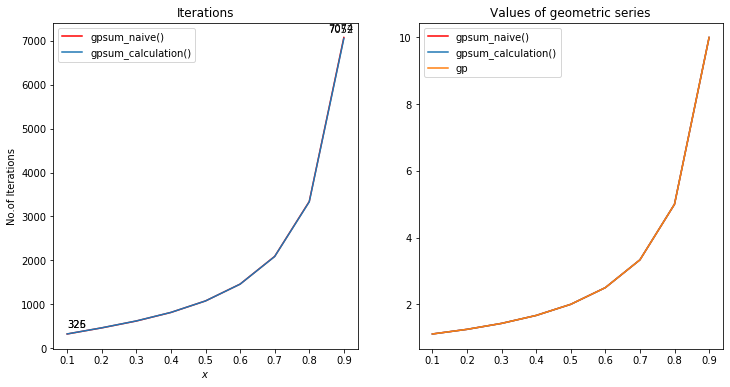

In [30]:
utils.compare_functions(gpsum_naive, gpsum_calculation, gp, "geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

The number of iterations are 7052, you can see it clearly in the graph below where the number of iterations are compared with ```gpsum_iterations()```.

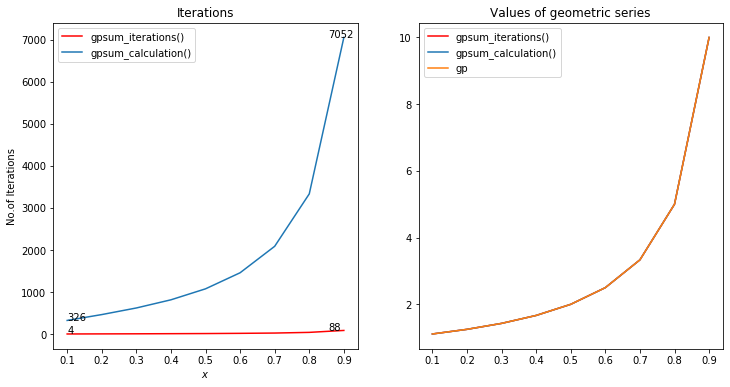

In [31]:
utils.compare_functions(gpsum_iterations, gpsum_calculation, gp, "geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

Along with the change in power calculation there is a change in terminating condition. I need to check whether these functions are giving the right output, I'll call the testing function on ```gpsum_calculation()```.

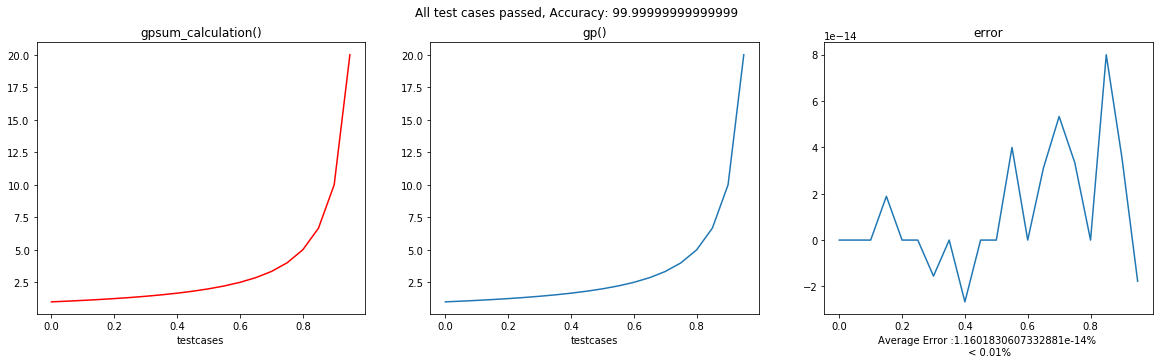

In [32]:
utils.theSeenAndTheUnseenTest(gpsum_calculation, gp, np.linspace(0, 1, num = 20, endpoint = False))


In [33]:
calculations_gp = utils.find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_calculation)

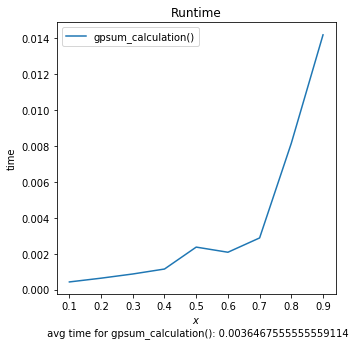

In [34]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (calculations_gp, gpsum_calculation))


Speedup with respect to naive implementations.

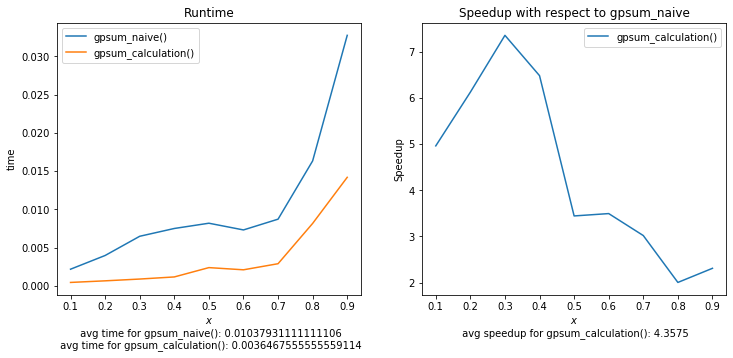

In [35]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True,
          first = (naive_gp, gpsum_naive), second = (calculations_gp, gpsum_calculation))

### Average speedup is $2\times$

By realising that the term calculated in one iteration can be used in the next the function becomes $2\times$ faster. 

| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$13 ms$| - |
| Iterations | $100\mu s$ | $100\times$|
| Calculating Power | $5.9 ms$ | $2\times$|

______________

![title](img\gp_alloptim.png)

In [36]:
def gpsum_allopts(a):
    s = 1
    t = 1
    count = 1 
    actual = gp(a)
    check = actual*(1 - 0.0001)
    
    #while(b != 0):
    #while t1 != t2:
    while s < check:
      # t = pow(a, i)
        t = t*a
        s = s + t
        count += 1
    return s, count

I've replaced the naive terminating condition with the ```gpsum_iterations```, added ```gpsum_calculation``` optimization. With these two changes made I need to ensure that I am not giving up too much of accuracy. I will ```theSeenAndTheUnseenTest()``` on ```gpsum_allopts```.

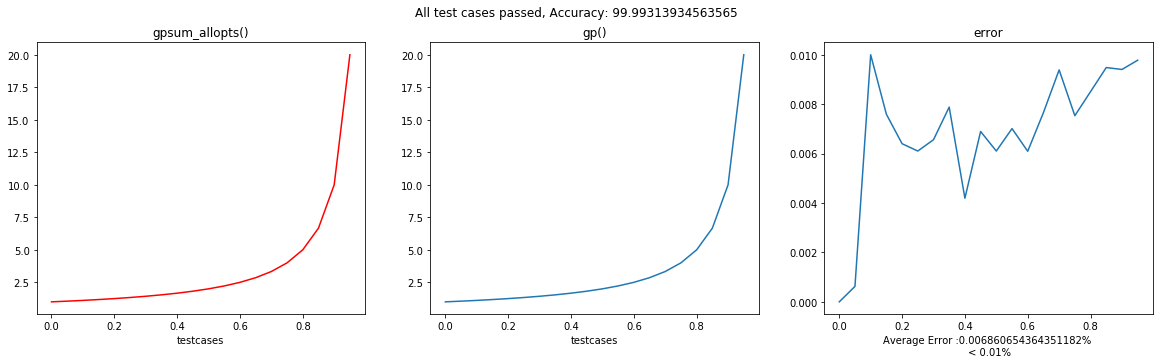

In [37]:
utils.theSeenAndTheUnseenTest(gpsum_allopts, gp, np.linspace(0, 1, num = 20, endpoint = False))

Aha! The ```gpsum_iterations()``` condition is keeping the error below 0.01. Now lets see the performance of ```gpsum_allopts```.

In [38]:
all_optimizations_gp = utils.find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_allopts)

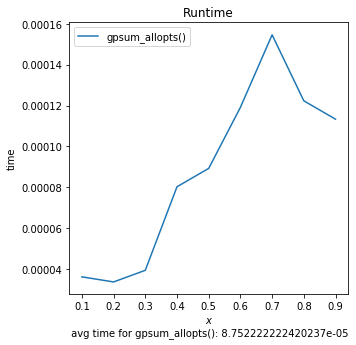

In [39]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (all_optimizations_gp, gpsum_allopts))

Comparing it with naive implementation

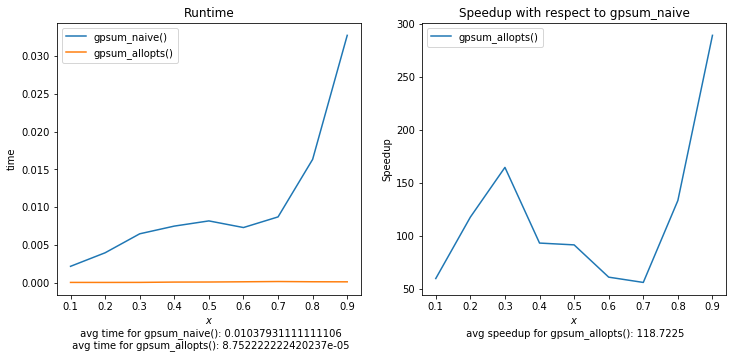

In [40]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), second = (all_optimizations_gp, gpsum_allopts))

### Speedup of $200\times$

Using ```plot_time()``` I will plot performance of all functions just to summarize what all is done till now.

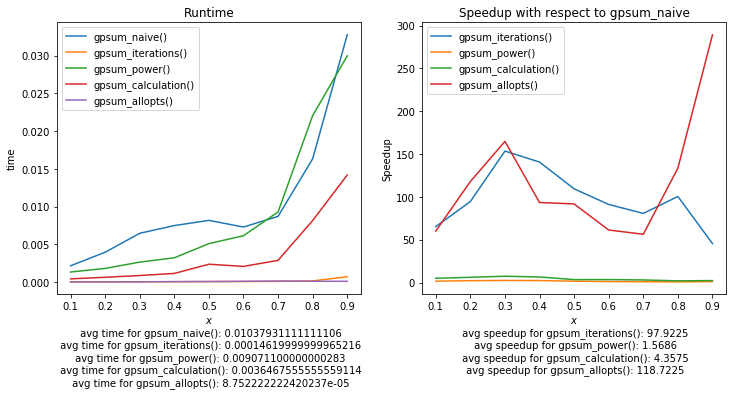

In [41]:
utils.plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), 
          second = (iterations_gp, gpsum_iterations),
          third = (power_gp, gpsum_power), 
          fourth = (calculations_gp, gpsum_calculation),
          fifth = (all_optimizations_gp, gpsum_allopts))

These all the previous runtime and speeup graphs put together. It feels good to see to bring the runtime plot from an exponential line to a somewhat linear line. 

With all these optimizations the highest computation time has come down from $0.05s$ to somewhere near $0.1ms$. 


| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$13 ms$| - |
| Iterations | $100\mu s$ | $100\times$|
| Calculating Power | $5.9 ms$ | $2\times$|
|All optimzations| $61 \mu s$|$200 \times$|